In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import os

In [5]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [6]:
df = pd.read_csv("data/BigData/체질검사.csv")

In [8]:
df.head(1)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4


In [9]:
df_x=df.drop('FAT',axis=1)
df_y=df['FAT']

In [10]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(176, 13)
train data Y size :(176,)
test data X size :(76, 13)
test data Y size :(76,)


In [11]:
rf_uncustomize=RandomForestRegressor(random_state=1234)
rf_uncustomize.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomize.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomize.score(df_test_x, df_test_y)))

Score on training set : 0.934
Score on test set : 0.552


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


    모델 설명력은 train 93.4%, test 55.2%
    모델은 train 데이터에 과대적합

#### 모델 parameter 조정

In [13]:
train_score=[]; test_score=[]

para_n_tree=[n_tree*10 for  n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


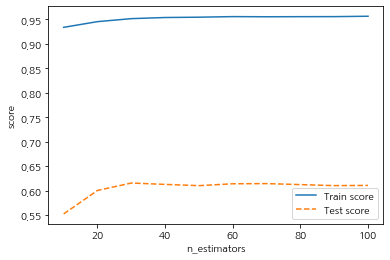

In [15]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

트리 수가 30개를 초과해도 설명력은 향상되지 않음

In [30]:
train_score=[]; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf =v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


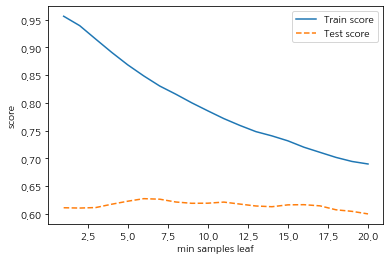

In [31]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드의 최소 자료수 증가에 따라 모델의 설명력은 감소하며 test 데이터의 정확도 변화를 고려하여 5 선택

In [39]:
train_score=[]; test_score=[]

para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf = 5, 
                            min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split['sub']=abs(df_score_split['TrainScore']-df_score_split['TestScore'])

df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore,sub
0,4,0.869,0.622,0.246
1,6,0.869,0.622,0.246
2,8,0.869,0.622,0.246
3,10,0.869,0.622,0.246
4,12,0.858,0.625,0.233
5,14,0.847,0.626,0.221
6,16,0.838,0.627,0.211
7,18,0.826,0.629,0.197
8,20,0.818,0.631,0.187
9,22,0.808,0.631,0.177


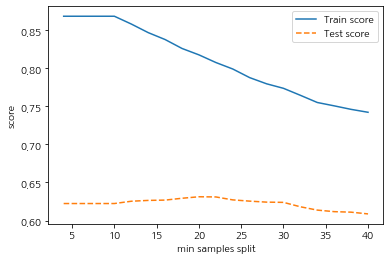

In [33]:
plt.plot(para_split, train_score, linestyle="-", label="Train score")
plt.plot(para_split, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [41]:
train_score=[]; test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100,
                             min_samples_leaf=5, min_samples_split=14, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score
df_score_depth['sub']=abs(df_score_depth['TrainScore']-df_score_depth['TestScore'])
df_score_depth.round(3)

,Depth,TrainScore,TestScore,sub
0,1,0.557,0.448,0.109
1,2,0.722,0.597,0.125
2,3,0.791,0.619,0.172
3,4,0.829,0.628,0.201
4,5,0.843,0.630,0.214
5,6,0.846,0.627,0.219
6,7,0.847,0.626,0.220
7,8,0.847,0.626,0.221
8,9,0.847,0.626,0.221
9,10,0.847,0.626,0.221


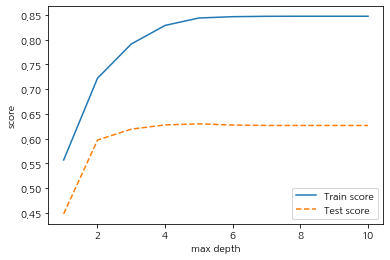

In [38]:
plt.plot(para_depth, train_score, linestyle="-", label="Train score")
plt.plot(para_depth, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

최대 깊이 증가에 따라 모델의 설명력은 증가하며 train / test 데이터 정확도 변화를 고려하여 4선택

In [40]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=5, min_samples_split=14, max_depth=4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.829
Score on test set : 0.628


최종 모델 시각화

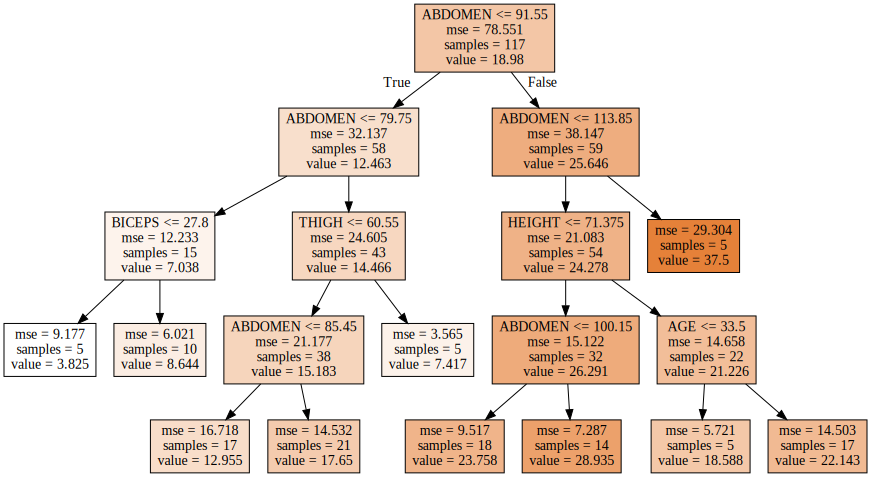

In [43]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot", feature_names=v_feature_name,
               impurity=True, filled=True)

with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

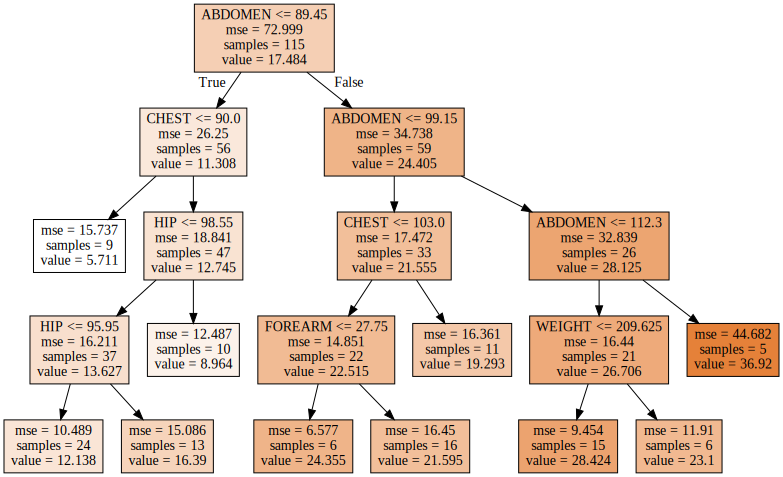

In [44]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[1], out_file="rfr_final_1.dot", feature_names=v_feature_name,
               impurity=True, filled=True)

with open("rfr_final_1.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

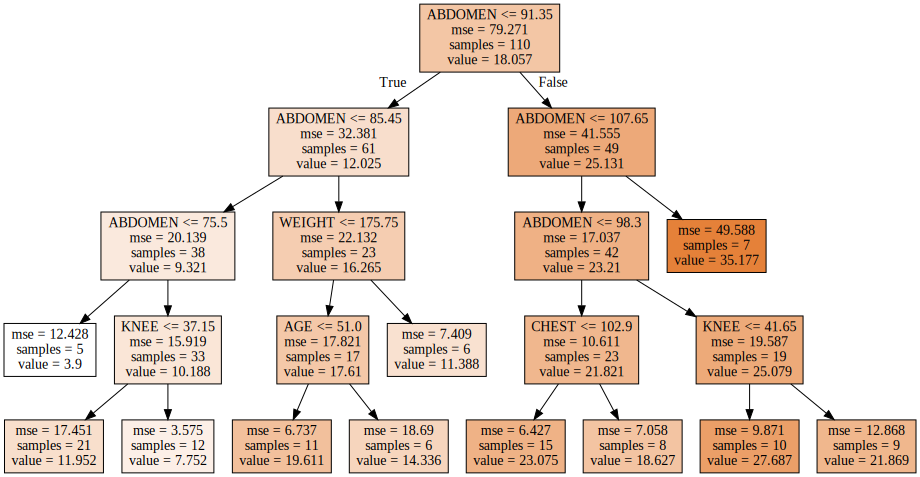

In [45]:
v_feature_name = df_train_x.columns

export_graphviz(rf_final.estimators_[10], out_file="rfr_final_10.dot", feature_names=v_feature_name,
               impurity=True, filled=True)

with open("rfr_final_10.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [47]:
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.839
4,CHEST,0.042
2,HEIGHT,0.030
6,HIP,0.014
0,AGE,0.014
7,THIGH,0.013
12,WRIST,0.012
3,NECK,0.010
8,KNEE,0.008
1,WEIGHT,0.007


Text(0, 0.5, '변수')

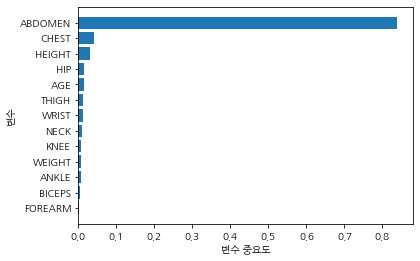

In [48]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### GridSearchCV를 이용한 최적 Parameter 찾기

In [49]:
estimator = RandomForestRegressor(random_state=1234)

param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator, param_grid, scoring ="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model\n {}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

best parameter : 
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score : 
0.685


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 랜덤 포레스트 실습

In [51]:
dia=pd.read_csv("data/BigData/DIABETES.csv")
dia.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [52]:
dia['GENDER']=[str(t) for t in dia['GENDER']]
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
Y              442 non-null int64
AGE            442 non-null int64
GENDER         442 non-null object
BMI            442 non-null float64
BP             442 non-null float64
CHOLESTEROL    442 non-null int64
LDL            442 non-null float64
HDL            442 non-null float64
TCH            442 non-null float64
LTG            442 non-null float64
GLUCOSE        442 non-null int64
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB


In [54]:
df_x=dia.drop('Y',axis=1)
df_y=dia['Y']

In [55]:
# x: 설명변수 데이터, y: 목표변수 데이터, test_size: test데이터 비율, random_state:random_seed
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y, test_size=0.3,
                                                               random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(309, 10)
train data Y size :(309,)
test data X size :(133, 10)
test data Y size :(133,)


In [56]:
rf_uncustomize=RandomForestRegressor(random_state=1234)
rf_uncustomize.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomize.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomize.score(df_test_x, df_test_y)))

Score on training set : 0.892
Score on test set : 0.393


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
train_score=[]; test_score=[]

para_n_tree=[n_tree*10 for  n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

    
df_score_n = pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score
df_score_n['sub']=abs(df_score_n['TrainScore']-df_score_n['TestScore'])

df_score_n.sort_values("sub", ascending=True, inplace=True) # 차이 컬럼을 생성해서 값 비교

df_score_n.round(3)

,n_estimators,TrainScore,TestScore,sub
4,50,0.914,0.458,0.456
5,60,0.915,0.454,0.461
9,100,0.919,0.455,0.463
6,70,0.915,0.451,0.464
7,80,0.917,0.451,0.466
3,40,0.911,0.442,0.469
8,90,0.919,0.450,0.469
2,30,0.908,0.432,0.475
0,10,0.892,0.393,0.498
1,20,0.908,0.404,0.504


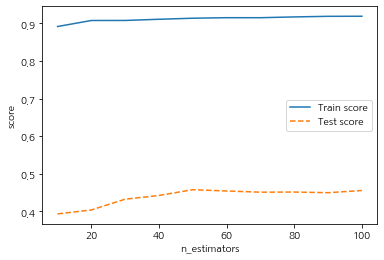

In [59]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [60]:
train_score=[]; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf =v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.455
1,2,0.883,0.461
2,3,0.832,0.471
3,4,0.786,0.470
4,5,0.752,0.468
5,6,0.718,0.470
6,7,0.694,0.475
7,8,0.671,0.474
8,9,0.650,0.478
9,10,0.633,0.476


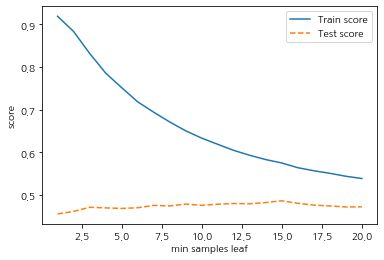

In [61]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [62]:
train_score=[]; test_score=[]

para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf = 10, 
                            min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score
df_score_split['sub']=abs(df_score_split['TrainScore']-df_score_split['TestScore'])

df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore,sub
0,4,0.633,0.476,0.158
1,6,0.633,0.476,0.158
2,8,0.633,0.476,0.158
3,10,0.633,0.476,0.158
4,12,0.633,0.476,0.158
5,14,0.633,0.476,0.158
6,16,0.633,0.476,0.158
7,18,0.633,0.476,0.158
8,20,0.633,0.476,0.158
9,22,0.628,0.476,0.151


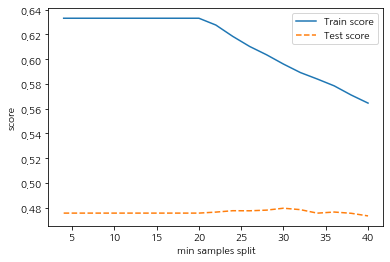

In [63]:
plt.plot(para_split, train_score, linestyle="-", label="Train score")
plt.plot(para_split, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [64]:
train_score=[]; test_score=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234, n_estimators=100,
                             min_samples_leaf=10, min_samples_split=20, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score
df_score_depth['sub']=abs(df_score_depth['TrainScore']-df_score_depth['TestScore'])
df_score_depth.round(3)

,Depth,TrainScore,TestScore,sub
0,1,0.387,0.406,0.019
1,2,0.491,0.472,0.019
2,3,0.559,0.491,0.068
3,4,0.599,0.484,0.115
4,5,0.624,0.479,0.145
5,6,0.632,0.476,0.156
6,7,0.633,0.476,0.158
7,8,0.633,0.476,0.158
8,9,0.633,0.476,0.158
9,10,0.633,0.476,0.158


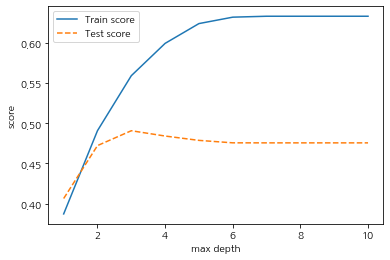

In [65]:
plt.plot(para_depth, train_score, linestyle="-", label="Train score")
plt.plot(para_depth, test_score, linestyle="--", label="Test score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [66]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=10, min_samples_split=20, max_depth=3)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set :{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set :0.559
Score on test set : 0.491


In [68]:
v_feature_name = df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.435
8,LTG,0.378
9,GLUCOSE,0.059
3,BP,0.058
6,HDL,0.032
7,TCH,0.016
5,LDL,0.009
0,AGE,0.006
4,CHOLESTEROL,0.004
1,GENDER,0.002


Text(0, 0.5, '변수')

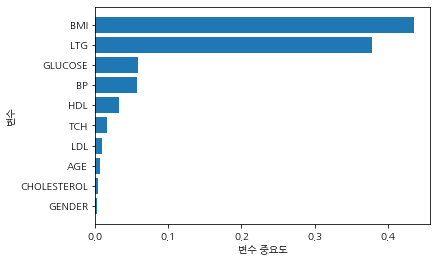

In [69]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### GridSearchCV를 사용한 예측 결과

In [76]:
estimator = RandomForestRegressor(random_state=1234)

param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt=GridSearchCV(estimator, param_grid, scoring ="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model\n {}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=36,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

best parameter : 
{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 36}

best score : 
0.383


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
